# Topic Modelling: _Documenting the American South_ 1866-1929

This JupyterNotebook was devised by DARIAH and can be retrieved from https://github.com/DARIAH-DE/Topics.

In [1]:
from pathlib import Path
import dariah
import cophi
from cophi_toolbox import preprocessing
import os
import metadata_toolbox.utils as metadata
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd

## Preprocessing the corpus

Setting the path:

In [2]:
directory = Path("data", "1866-1929-chunks")

Displaying the files in the folder:

In [3]:
sorted(os.listdir(path=directory))

['church-hatcher-hatcher_0000.txt',
 'church-hatcher-hatcher_0001.txt',
 'church-hatcher-hatcher_0002.txt',
 'church-hatcher-hatcher_0003.txt',
 'church-hatcher-hatcher_0004.txt',
 'fpn-bruce-bruce_0000.txt',
 'fpn-bruce-bruce_0001.txt',
 'fpn-bruce-bruce_0002.txt',
 'fpn-bruce-bruce_0003.txt',
 'fpn-bruce-bruce_0004.txt',
 'fpn-burton-burton_0000.txt',
 'fpn-burton-burton_0001.txt',
 'fpn-burtont-burton_0000.txt',
 'fpn-burtont-burton_0001.txt',
 'fpn-ferebee-ferebee_0000.txt',
 'fpn-hughes-hughes_0000.txt',
 'fpn-hughes-hughes_0001.txt',
 'fpn-hughes-hughes_0002.txt',
 'fpn-hughes-hughes_0003.txt',
 'fpn-hughes-hughes_0004.txt',
 'fpn-lane-lane_0000.txt',
 'fpn-lane-lane_0001.txt',
 'fpn-lane-lane_0002.txt',
 'fpn-mason-mason_0000.txt',
 'fpn-mason-mason_0001.txt',
 'fpn-robinson-robinson_0000.txt',
 'fpn-robinson-robinson_0001.txt',
 'fpn-robinson-robinson_0002.txt',
 'fpn-robinson-robinson_0003.txt',
 'fpn-robinson-robinson_0004.txt',
 'fpn-veney-veney_0000.txt',
 'fpn-washeducatio

In [4]:
pattern = '{abbr}-{author}-{author2}_{chunk}'

Generates a table featuring the files' abbreviation, author and second mention of author:

In [5]:
meta = pd.concat([metadata.fname2metadata(str(path), pattern=pattern) for path in directory.glob('*.txt')])
meta[:10]

,abbr,author,author2,chunk
data\1866-1929-chunks\church-hatcher-hatcher_0000.txt,church,hatcher,hatcher,0000
data\1866-1929-chunks\church-hatcher-hatcher_0001.txt,church,hatcher,hatcher,0001
data\1866-1929-chunks\church-hatcher-hatcher_0002.txt,church,hatcher,hatcher,0002
data\1866-1929-chunks\church-hatcher-hatcher_0003.txt,church,hatcher,hatcher,0003
data\1866-1929-chunks\church-hatcher-hatcher_0004.txt,church,hatcher,hatcher,0004
data\1866-1929-chunks\fpn-bruce-bruce_0000.txt,fpn,bruce,bruce,0000
data\1866-1929-chunks\fpn-bruce-bruce_0001.txt,fpn,bruce,bruce,0001
data\1866-1929-chunks\fpn-bruce-bruce_0002.txt,fpn,bruce,bruce,0002
data\1866-1929-chunks\fpn-bruce-bruce_0003.txt,fpn,bruce,bruce,0003
data\1866-1929-chunks\fpn-bruce-bruce_0004.txt,fpn,bruce,bruce,0004


Read the documents and display the text of a sample file:

In [9]:
corpus = list(preprocessing.read_files(meta.index))
corpus[0]

'john jasper reader stay a moment a word with you before you begin to sample this book we will tell you some thing in advance which may help you to decide whether it be worth while to read any far these page deal with a negro and be not design either to help or to hurt the negro race they have only to do with one man he be one of a class — without pedigree and really without successor except that he be so dominant and infectious that number of people affect his way and dream that they be one of his sort as a fact they be simply of another and of a base sort the man in question be a negro and if you can not appreciate greatness in a black skin you would do well to turn your thought into some other channel moreover he be a negro cover over with ante bellum habit and way of do he live forty year before the war and for about forty year after it he grow wonderfully as a freeman but he never grow away from the taste dialect and manner of the bondage time he be a man leave over from the old r

### Tokenising using cophi
(see https://github.com/cophi-wue/cophi-toolbox/blob/master/notebooks/introducing-cophi.ipynb):

In [10]:
corpus, metadata = cophi.corpus(directory,
                      lowercase=True,
                      token_pattern=r"\p{Letter}+\p{Connector_Punctuation}?\p{Letter}+",
                      metadata=True)

In [11]:
corpus.stats

documents        536.0
types          44565.0
tokens       4883665.0
hapax          27408.0
dtype: float64

### Removal of most frequent words, hapax legomena, and person names
List of most frequent words:

In [12]:
mfw = corpus.mfw(70)
mfw

['the',
 'be',
 'and',
 'of',
 'to',
 'in',
 'he',
 'have',
 'that',
 'for',
 'his',
 'it',
 'they',
 'as',
 'with',
 'my',
 'not',
 'at',
 'we',
 'this',
 'on',
 'by',
 'but',
 'do',
 'she',
 'from',
 'all',
 'man',
 'one',
 'you',
 'would',
 'say',
 'which',
 'go',
 'their',
 'when',
 'so',
 'who',
 'or',
 'there',
 'an',
 'time',
 'make',
 'her',
 'come',
 'no',
 'will',
 'our',
 'see',
 'year',
 'people',
 'take',
 'could',
 'give',
 'if',
 'day',
 'out',
 'mr',
 'some',
 'other',
 'up',
 'get',
 'know',
 'work',
 'after',
 'good',
 'great',
 'then',
 'what',
 'well']

Hapax legomena (words occuring only once in the corpus):

In [13]:
corpus.hapax[:10]

['aa',
 'aand',
 'aback',
 'abaddon',
 'abadie',
 'abagail',
 'abanbridge',
 'abandoning',
 'abase',
 'abasement']

Default stopword list:

In [14]:
path_to_stopwordlist = "data/stopwords/en.txt"
extern_stopwords = [line.strip() for line in open(path_to_stopwordlist, 'r')]
extern_stopwords[:10]

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act']

List of person names generated through NLTK's Named Entitity Recognition:

In [15]:
path_to_ner = "data/stopwords/docsouth-ner.txt"
ner = [line.strip() for line in open(path_to_ner, 'r')]
ner[:10]

['mr. boyce',
 'old frank',
 'miss bett',
 'oft',
 'nelly',
 'walter brooks',
 'beamed',
 'gone down',
 'peter coffin',
 'englishman']

Definition of most frequent words, hapax legomena, the default stopword list, and the person names:

In [16]:
features = mfw + corpus.hapax + extern_stopwords + ner

print(f"{len(features)} types will be removed from the corpus.")

59454 types will be removed from the corpus.


Displaying meta data:

In [17]:
metadata.iloc[:10]

,uuid,filepath,parent,title,suffix
0,3353ace3-4276-11ee-ab92-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0000,.txt
1,3354af27-4276-11ee-a61a-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0001,.txt
2,335750bb-4276-11ee-b47f-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0002,.txt
3,3358d7e0-4276-11ee-bf8a-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0003,.txt
4,33599b61-4276-11ee-8446-00090ffe0001,data\1866-1929-chunks\church-hatcher-hatcher_0...,data\1866-1929-chunks,church-hatcher-hatcher_0004,.txt
5,335afaec-4276-11ee-b91f-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0000.txt,data\1866-1929-chunks,fpn-bruce-bruce_0000,.txt
6,335c5c1c-4276-11ee-af11-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0001.txt,data\1866-1929-chunks,fpn-bruce-bruce_0001,.txt
7,335c5c1d-4276-11ee-a554-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0002.txt,data\1866-1929-chunks,fpn-bruce-bruce_0002,.txt
8,335ebf1f-4276-11ee-bbb8-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0003.txt,data\1866-1929-chunks,fpn-bruce-bruce_0003,.txt
9,335ebf20-4276-11ee-bc1e-00090ffe0001,data\1866-1929-chunks\fpn-bruce-bruce_0004.txt,data\1866-1929-chunks,fpn-bruce-bruce_0004,.txt


The corpus is represented as a document-term matrix with absolute word frequencies from which the features you selected above are dropped:

In [18]:
dtm = corpus.drop(corpus.dtm, features).fillna(0).astype(int)
dtm.iloc[:5, :5]

,ab,abaft,abandon,abandonment,abatis
3353ace3-4276-11ee-ab92-00090ffe0001,0,0,0,0,0
3354af27-4276-11ee-a61a-00090ffe0001,0,0,0,0,0
335750bb-4276-11ee-b47f-00090ffe0001,0,0,2,0,0
3358d7e0-4276-11ee-bf8a-00090ffe0001,0,0,1,0,0
33599b61-4276-11ee-8446-00090ffe0001,0,0,0,0,0


In [19]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["title"]).fillna(0).astype(int)
dtm.iloc[:5,:10]

,ab,abaft,abandon,abandonment,abatis,abbeville,abbeyville,abble,abbott,abdelkader
church-hatcher-hatcher_0000,0,0,0,0,0,0,0,0,0,0
church-hatcher-hatcher_0001,0,0,0,0,0,0,0,0,0,0
church-hatcher-hatcher_0002,0,0,2,0,0,0,0,0,0,0
church-hatcher-hatcher_0003,0,0,1,0,0,0,0,0,0,0
church-hatcher-hatcher_0004,0,0,0,0,0,0,0,0,0,0


## Training the model

In [20]:
# Show all rows of the topic model
pd.set_option('display.max_rows', None)

In [21]:
model = dariah.core.LDA(num_topics=80,
                        num_iterations=5000,
                        mallet="C:/mallet/bin/mallet.bat")
model

<Model: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [22]:
model.fit(dtm)

Topic-word distribution:

In [23]:
model.topics.iloc[:, :10]

,word0,word1,word2,word3,word4,word5,word6,word7,word8,word9
topic0,child,plantation,face,farm,american,quarter,size,system,remember,neighborhood
topic1,dice,tock,quarter,question,cæsar,eye,grow,chile,door,hour
topic2,child,thing,remember,morning,send,hand,sunday,bring,thee,door
topic3,child,twoheaded,conductor,exhibition,dual,separate,body,pair,arm,portion
topic4,haïti,môle,matthia,government,admiral,wagener,naval,van,negotiation,american
topic5,plant,product,grow,method,vegetable,agricultural,acre,farm,result,produce
topic6,community,newspaper,thing,condition,problem,interest,opportunity,example,ago,member
topic7,soldier,general,regiment,officer,company,fort,boat,capture,troop,command
topic8,slaveholder,hand,whip,child,side,tie,lash,natural,shipyard,moment
topic9,plantation,child,thing,farm,morning,folk,remember,grow,service,sunday


Topic-document distribution

In [24]:
model.topic_document.iloc[:5, :5]

1,church-hatcher-hatcher_0000,church-hatcher-hatcher_0001,church-hatcher-hatcher_0002,church-hatcher-hatcher_0003,church-hatcher-hatcher_0004
topic0,1.416419e-02,7.677661e-07,7.296714e-07,8.095331e-07,0.000002
topic1,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002
topic2,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002
topic3,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002
topic4,8.852064e-07,7.677661e-07,7.296714e-07,8.095331e-07,0.000002


## Visualising the model

In [25]:
vis = dariah.core.Vis(model)
vis

<Visualization: LDA, 80 topics, 5000 iterations, alpha=0.1, eta=0.01>

In [26]:
# Information about possible visualisations:
#help(vis)

Heatmap displaying the prevalence of topics within the individual documents:

<AxesSubplot:ylabel='1'>

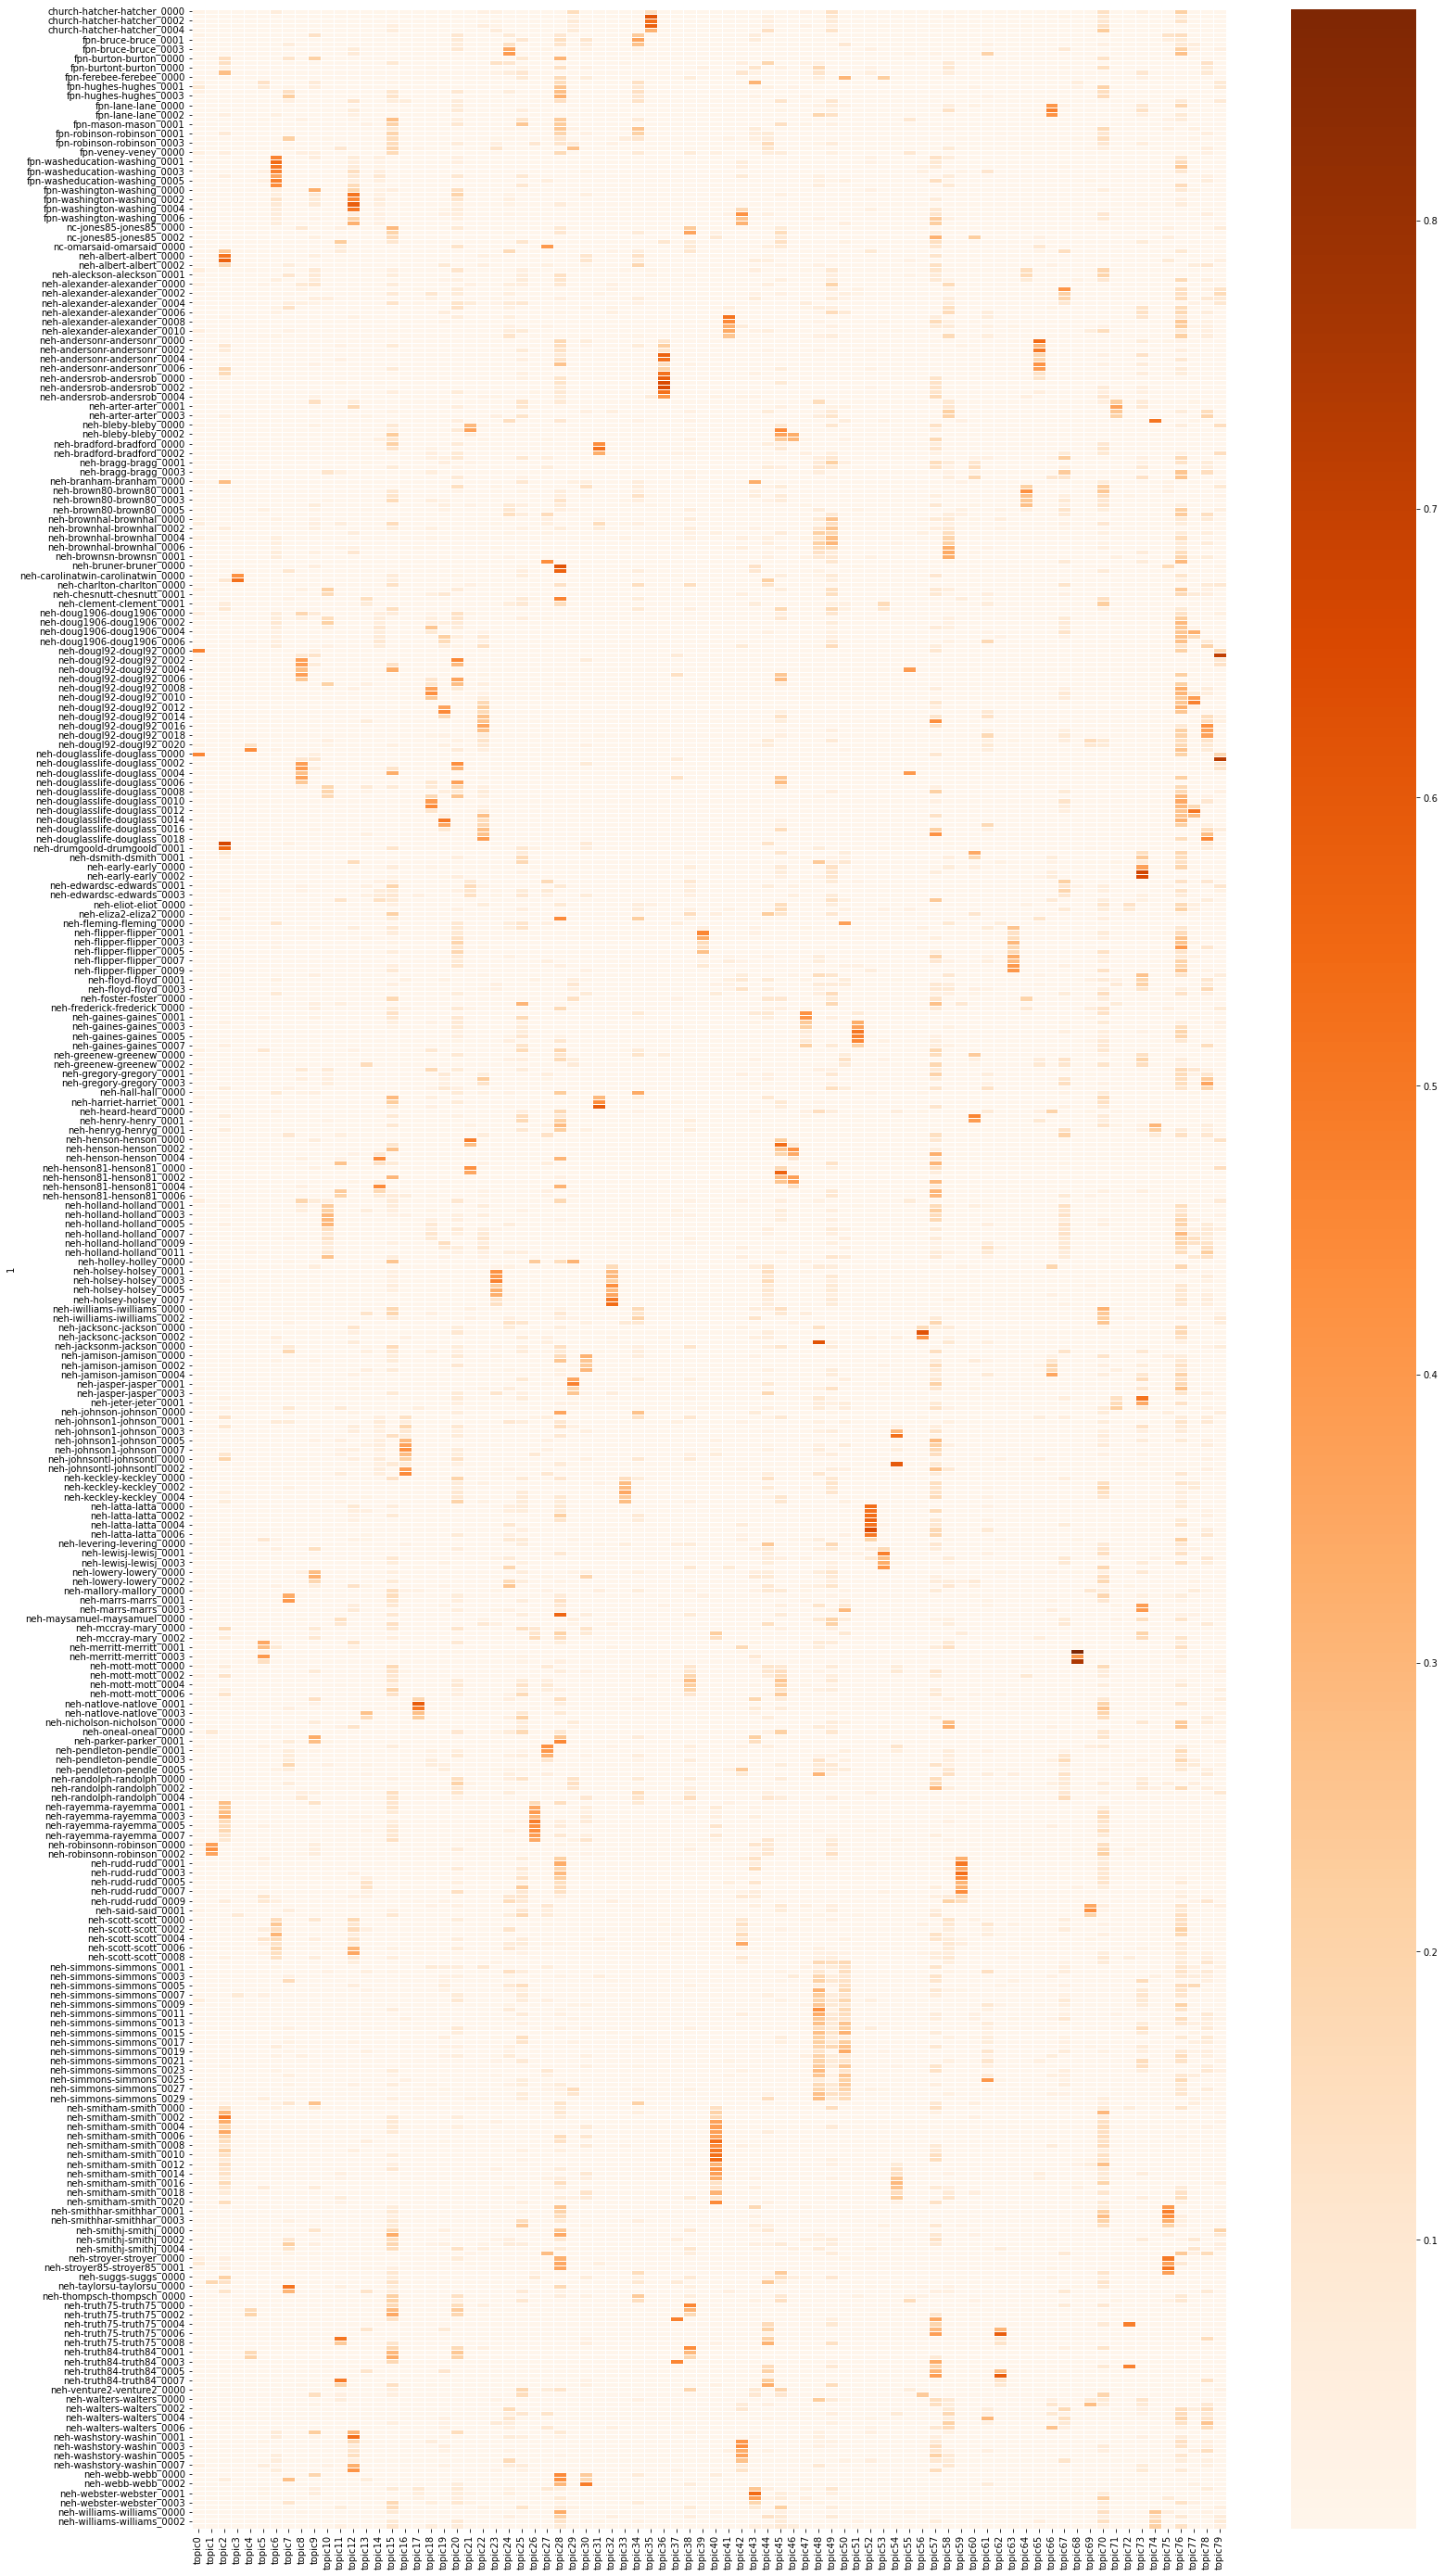

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 50] 
vis.topic_document(cmap='Oranges')

Comparison of topics:

<AxesSubplot:>

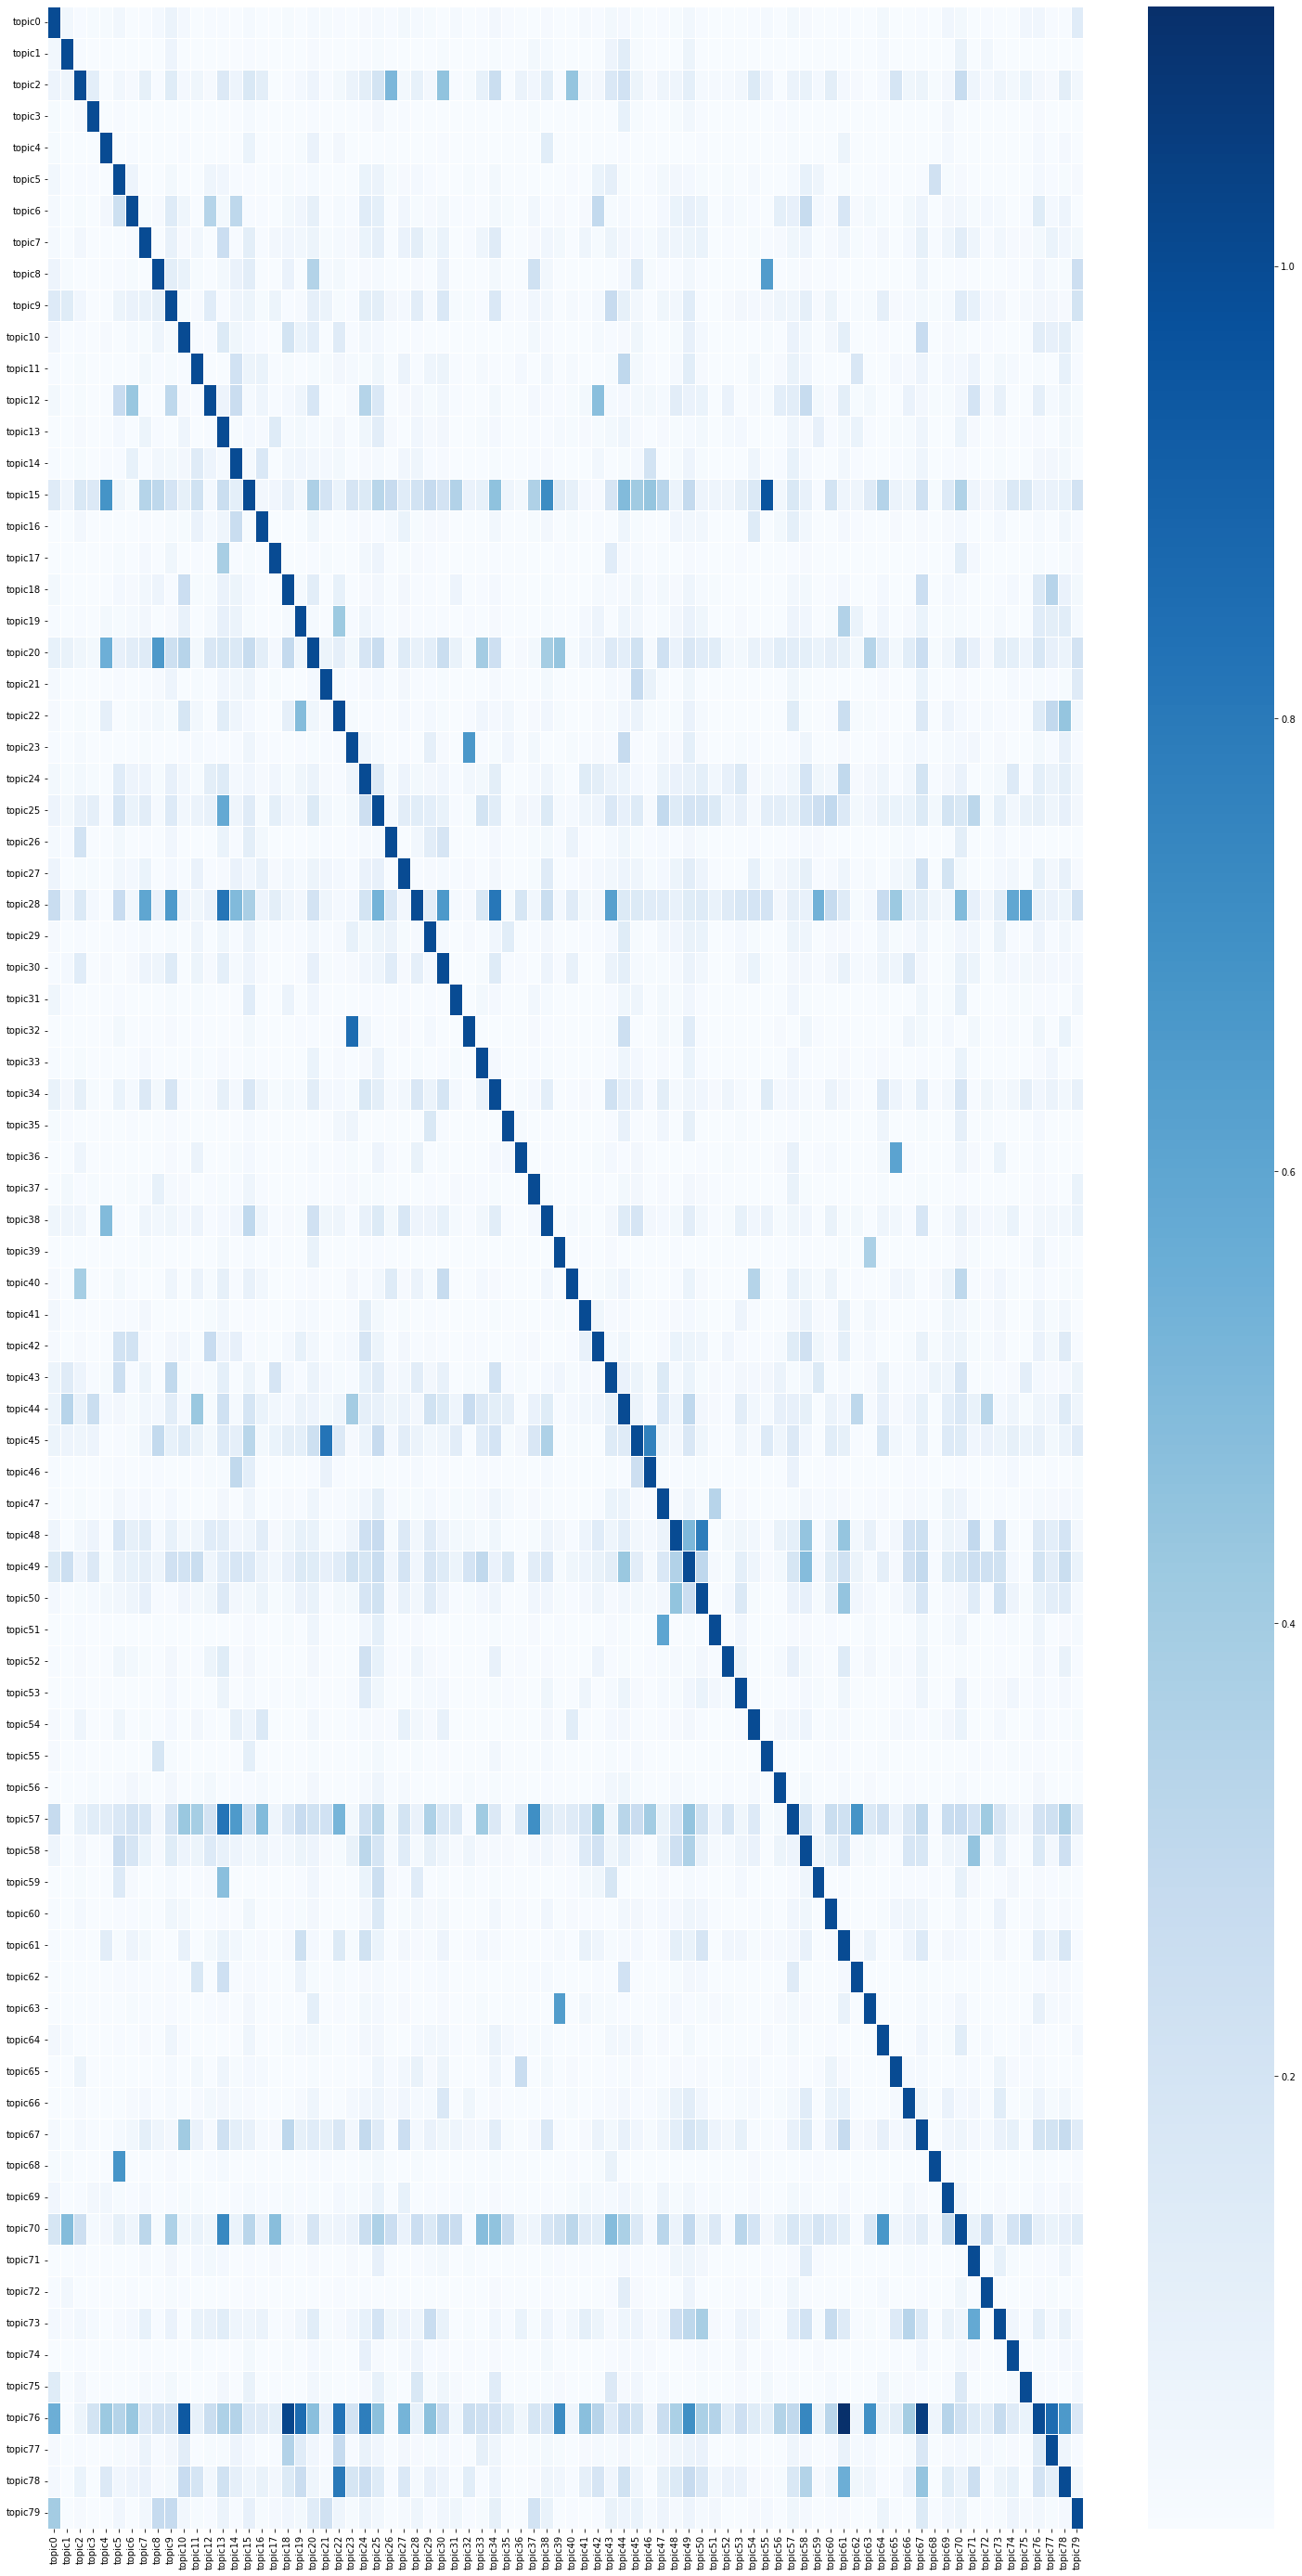

In [37]:
vis.topic_similarities(cbar=True)

Comparison of the frequency of specific words in the distinct topics:

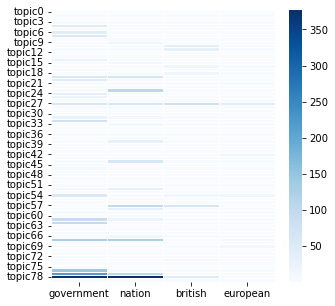

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5] 

vis.topic_word(words=["government", "nation", "british", "european"])

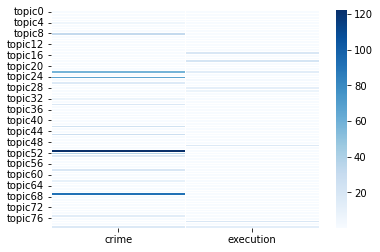

In [39]:
%matplotlib inline

vis.topic_word(words=["crime", "execution"], cbar=True)

Distribution of words within a topic:

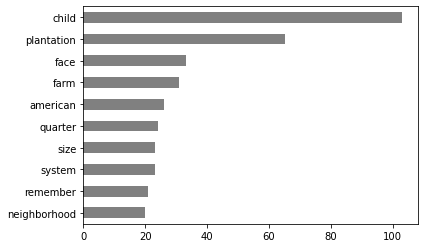

In [40]:
vis.topic("topic0")
plt.rcParams['figure.figsize'] = [10, 10]

Distribution of topics within a given document:

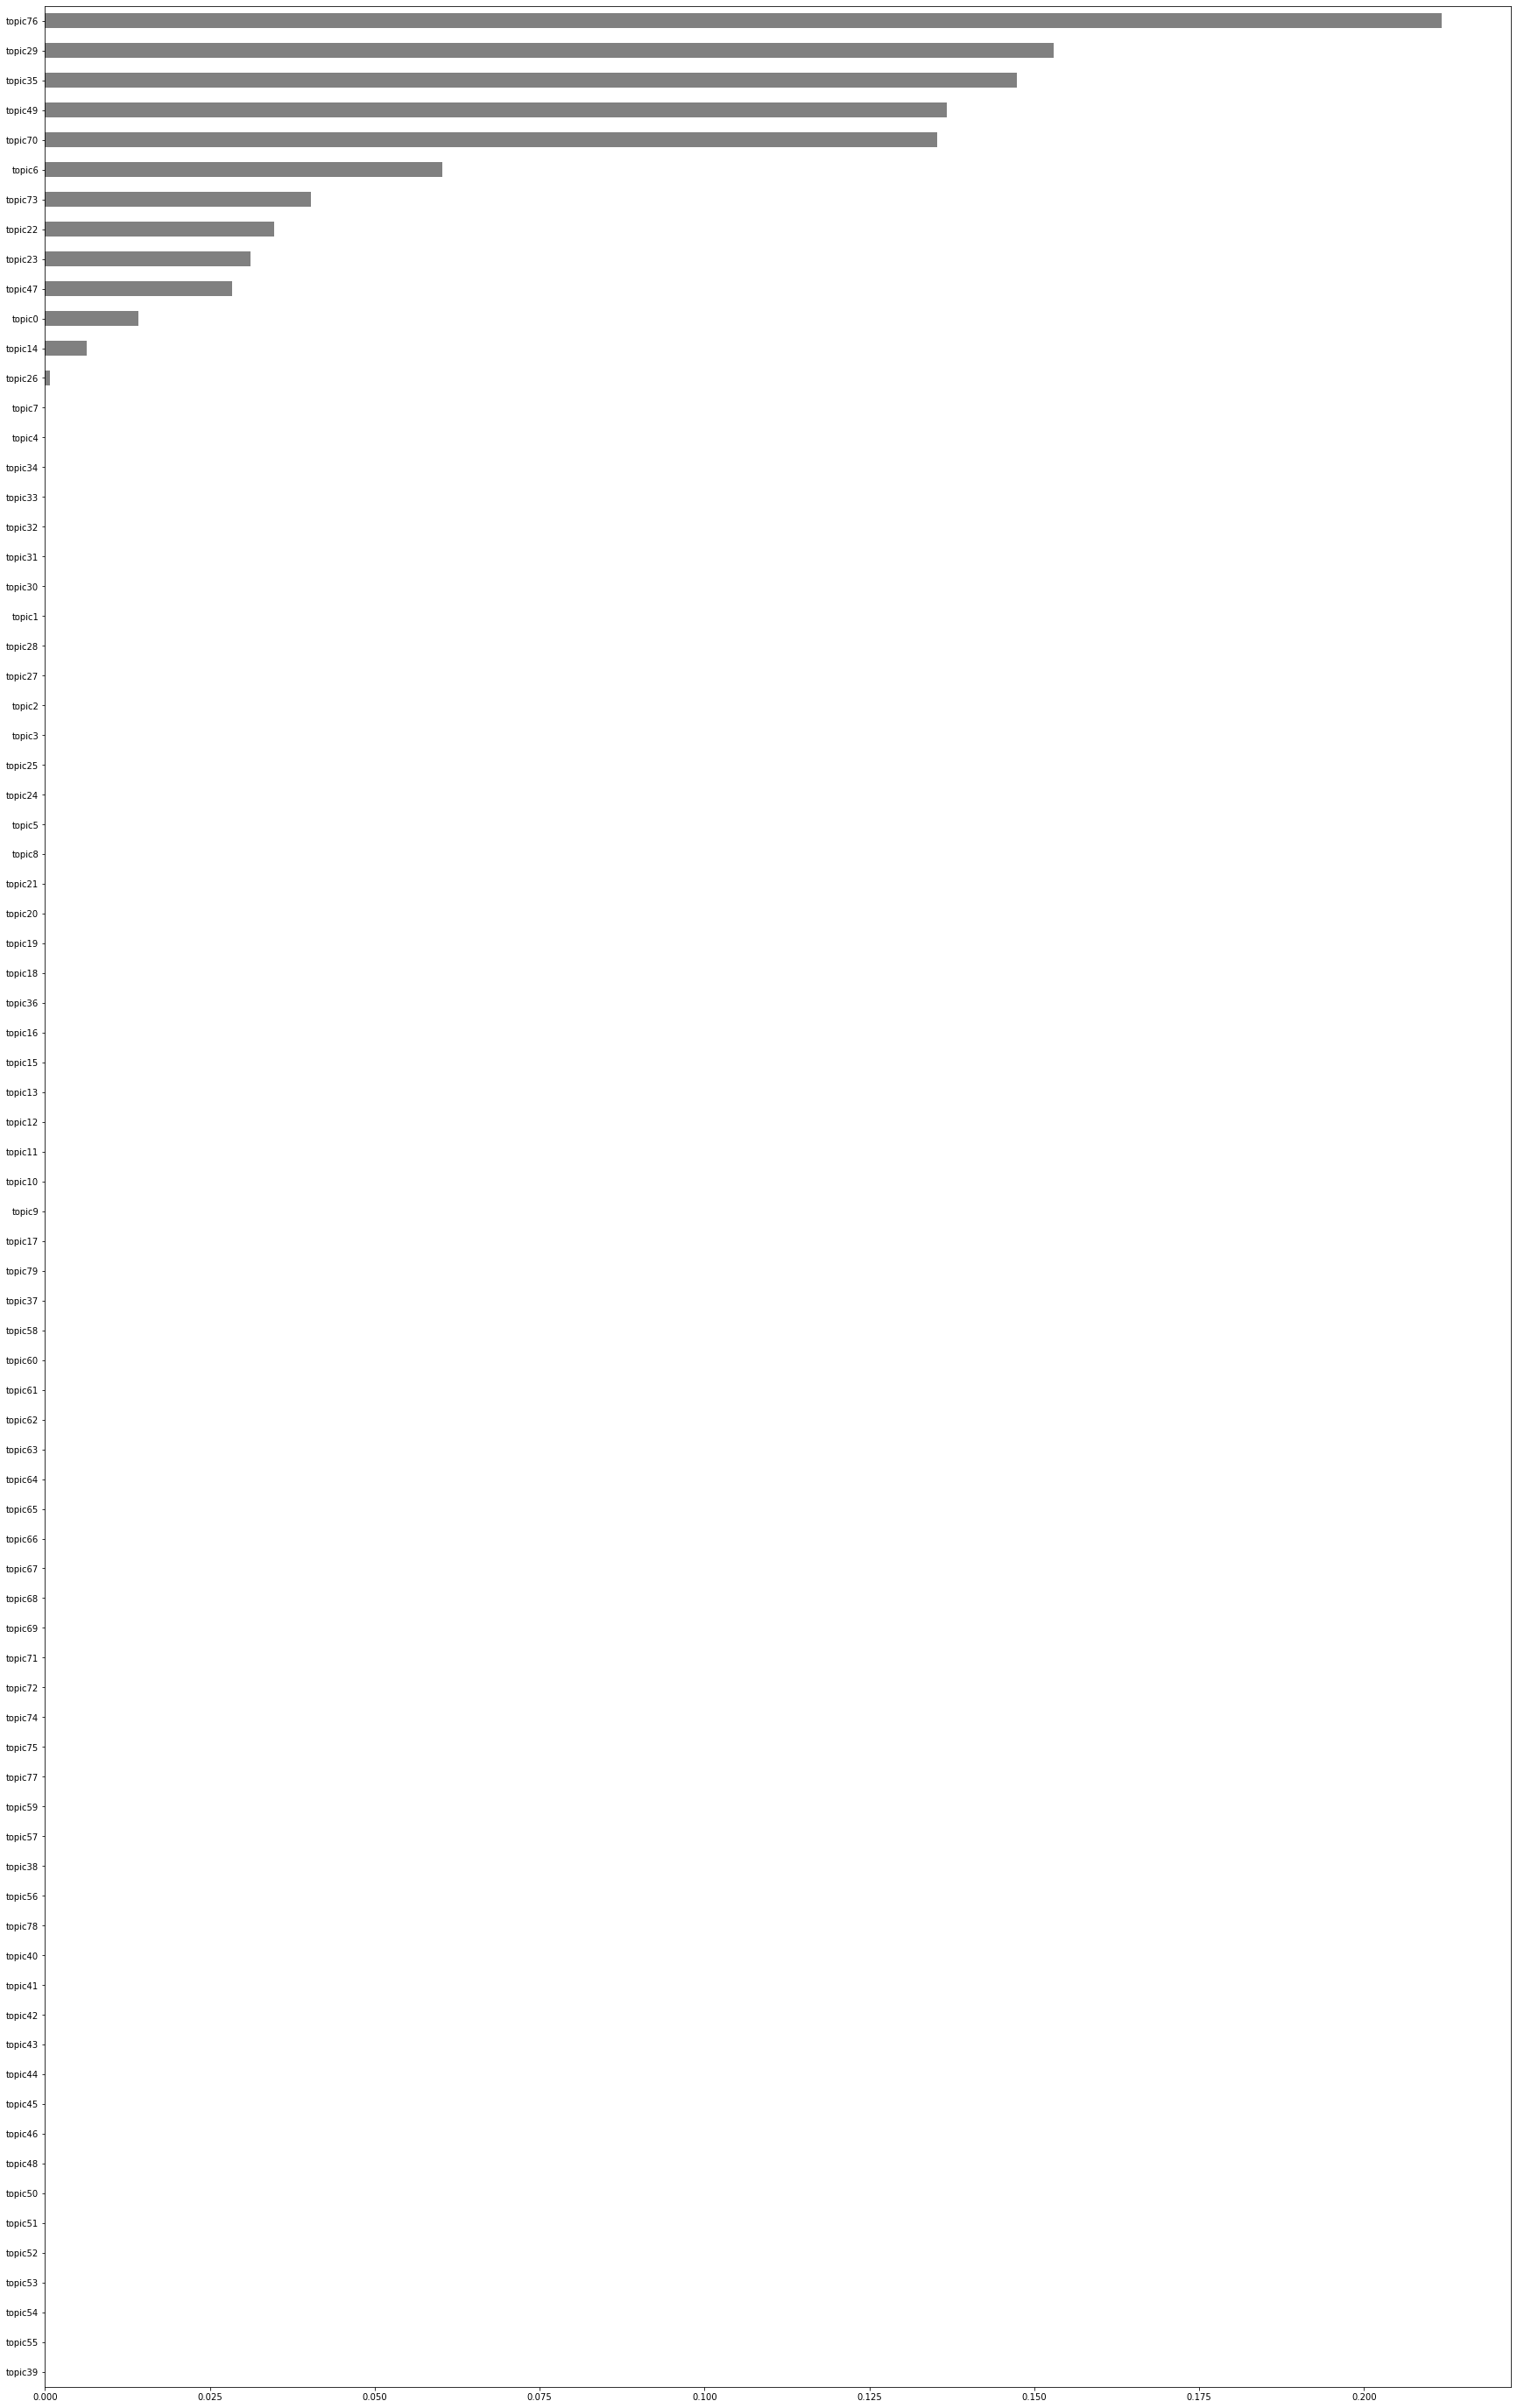

In [42]:
vis.document("church-hatcher-hatcher_0000")
plt.rcParams['figure.figsize'] = [40, 50]